# E_Commerce_data

# Describtion
This dataset contains records of e-commerce transactions, focusing on linear regression analysis. It includes key variables such as original price, discount percentage, and final price, allowing for the prediction of final costs based on discounts. Other details, including product category, payment method, and purchase date, offer insights into shopping trends and consumer behavior. This dataset is valuable for analyzing pricing strategies and understanding the influence of discounts on purchase decisions.

In [23]:
# importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# loading data
df=pd.read_csv("D:\data analytics\data set\ecommerce_dataset_updated.csv")
print(df.head(10))

    User_ID  Product_ID        Category  Price (Rs.)  Discount (%)  \
0  337c166f  f414122f-e          Sports        36.53            15   
1  d38a19bf  fde50f9c-5        Clothing       232.79            20   
2  d7f5f0b0  0d96fc90-3          Sports       317.02            25   
3  395d4994  964fc44b-d            Toys       173.19            25   
4  a83c145c  d70e2fc6-e          Beauty       244.80            20   
5  3fdcdae8  0816ee12-5           Books       241.86            50   
6  12772337  d41e0b55-c            Toys        76.91             5   
7  9f0194af  83b7dc04-5          Sports       213.23            20   
8  7a8559d8  87c9c896-1          Sports       379.81             5   
9  8911f0d1  31308875-b  Home & Kitchen       415.36            50   

   Final_Price(Rs.) Payment_Method Purchase_Date  
0             31.05    Net Banking    12-11-2024  
1            186.23    Net Banking    09-02-2024  
2            237.76    Credit Card    01-09-2024  
3            129.89      

In [25]:
# dropping columns
df.drop(columns=['User_ID','Product_ID','Purchase_Date'],inplace=True)

In [26]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Category          3660 non-null   object 
 1   Price (Rs.)       3660 non-null   float64
 2   Discount (%)      3660 non-null   int64  
 3   Final_Price(Rs.)  3660 non-null   float64
 4   Payment_Method    3660 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 143.1+ KB


In [27]:
# Cleaning data
df.dropna()
print(df.isna().sum())
print(df.duplicated().sum())

,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method
0,Sports,36.53,15,31.05,Net Banking
1,Clothing,232.79,20,186.23,Net Banking
2,Sports,317.02,25,237.76,Credit Card
3,Toys,173.19,25,129.89,UPI
4,Beauty,244.80,20,195.84,Net Banking
...,...,...,...,...,...
3655,Beauty,486.79,0,486.79,UPI
3656,Toys,212.87,15,180.94,Cash on Delivery
3657,Home & Kitchen,389.76,0,389.76,Net Banking
3658,Electronics,447.66,30,313.36,UPI


([0, 1, 2],
 [Text(0, 0, 'Price (Rs.)'),
  Text(1, 0, 'Discount (%)'),
  Text(2, 0, 'Final_Price(Rs.)')])

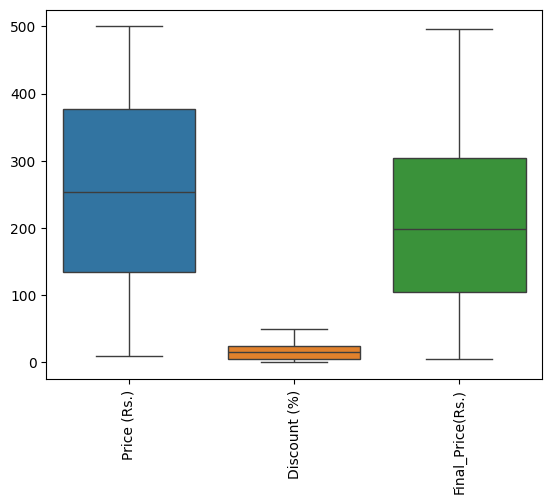

In [29]:
# finding outliers
sns.boxplot(data=df)
plt.xticks(rotation=90)

In [30]:
df.describe()

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [31]:
# Changing datatype
df['Category']=df['Category'].astype('string')
df['Payment_Method']=df['Payment_Method'].astype('string')

In [32]:
# Renaming data
df=df.rename(columns={'Price (Rs.)':'Price','Final_Price(Rs.)':'Final_Price'})

                 Price  Discount (%)  Final_Price
Price         1.000000     -0.003473     0.935691
Discount (%) -0.003473      1.000000    -0.311515
Final_Price   0.935691     -0.311515     1.000000


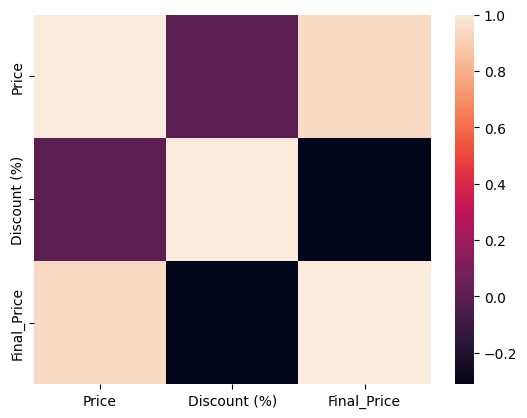

In [33]:
# Finding correalation
corr=df.corr(numeric_only=True)
print(corr)
sns.heatmap(corr)
plt.show()

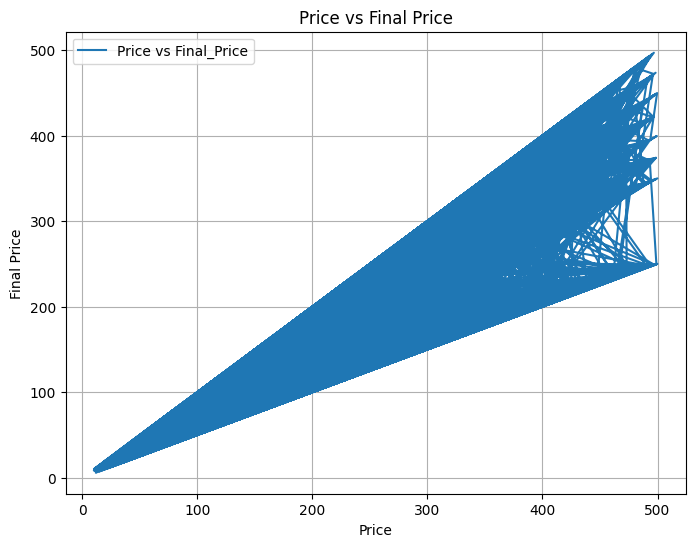

In [34]:

plt.figure(figsize=(8, 6))
plt.plot(df['Price'], df['Final_Price'], label='Price vs Final_Price')
plt.xlabel('Price')
plt.ylabel('Final Price')
plt.title('Price vs Final Price')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Assigning dependent and independent variable
x=df.iloc[:,:3]
df=pd.DataFrame(df)
y=df.iloc[:,3]
print(y)
x=pd.DataFrame(x)
print(x)
y=pd.DataFrame(y)
print(y)

0        31.05
1       186.23
2       237.76
3       129.89
4       195.84
         ...  
3655    486.79
3656    180.94
3657    389.76
3658    313.36
3659    165.04
Name: Final_Price, Length: 3660, dtype: float64
            Category   Price  Discount (%)
0             Sports   36.53            15
1           Clothing  232.79            20
2             Sports  317.02            25
3               Toys  173.19            25
4             Beauty  244.80            20
...              ...     ...           ...
3655          Beauty  486.79             0
3656            Toys  212.87            15
3657  Home & Kitchen  389.76             0
3658     Electronics  447.66            30
3659  Home & Kitchen  235.77            30

[3660 rows x 3 columns]
      Final_Price
0           31.05
1          186.23
2          237.76
3          129.89
4          195.84
...           ...
3655       486.79
3656       180.94
3657       389.76
3658       313.36
3659       165.04

[3660 rows x 1 columns]


In [36]:
#load linear regression class
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

# Splitting the dataset into training and test set .
x_train, x_test, y_train, y_test= train_test_split(x,
y, test_size=.2, random_state=0)
label_encoders = {}
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['Category'])], remainder='passthrough'
)
x = np.array(column_transformer.fit_transform(x))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred=regressor.predict(x_test)

# Select features and target variable
values = ['Category', 'Price', 'Discount (%)', 'Payment_Method']
prediction = 'Final_Price'

X = df[values]
Y = df[prediction]
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred=regressor.predict(x_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
score=r2_score(y_test,y_pred)
print("r2 socre is ",score*100,"%")


Mean Absolute Error: 14.603153662202184
Mean Squared Error: 442.4962945706647
Root Mean Squared Error: 21.035595892930267
r2 socre is  97.12137991603025 %


In [38]:
y_train

,Final_Price
2252,35.89
3243,231.24
3310,211.34
728,197.76
2933,438.55
...,...
835,293.87
3264,199.17
1653,376.76
2607,15.54


In [40]:

model1=XGBRegressor()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.9998559355735779
